# Task: Morning Routine Productivity Analysis (EDA, Modeling, and GUI)

## Data overview & loading

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset into a pandas DataFrame
# NOTE: You must have 'Morning_Routine_Productivity_Dataset.csv' in the same directory as this notebook.
try:
    df = pd.read_csv("Morning_Routine_Productivity_Dataset.csv")
except FileNotFoundError:
    print("Error: 'Morning_Routine_Productivity_Dataset.csv' not found. Please ensure the file is in the correct location.")
    df = pd.DataFrame() # Create an empty DataFrame to prevent later errors

if not df.empty:
    # Display the first 5 rows of the DataFrame
    print("Head of the DataFrame:")
    display(df.head())

    # Print a concise summary of the DataFrame
    print("\nInfo of the DataFrame:")
    df.info()

    # Generate descriptive statistics of the DataFrame
    print("\nDescriptive statistics of the DataFrame:")
    display(df.describe())

Head of the DataFrame:


,Date,Wake-up Time,Sleep Duration (hrs),Meditation (mins),Exercise (mins),Breakfast Type,Journaling (Y/N),Work Start Time,Productivity Score (1-10),Mood,Notes
0,2023-02-01 10:21:52.870632,5:30 AM,6.6,20,60,Protein-rich,Yes,6:30 AM,6,Neutral,Collection whole decision middle.
1,2023-02-02 10:21:52.870632,8:15 AM,8.0,5,50,Heavy,No,11:15 AM,7,Happy,Tree player behavior various up such attention...
2,2023-02-03 10:21:52.870632,8:30 AM,8.9,25,30,Carb-rich,Yes,10:30 AM,10,Happy,If hard focus nor trip forward change per.
3,2023-02-04 10:21:52.870632,5:00 AM,8.4,25,30,Skipped,Yes,7:00 AM,7,Happy,Physical threat federal with thing.
4,2023-02-05 10:21:52.870632,5:15 AM,8.2,25,30,Heavy,No,6:15 AM,10,Happy,Ground class Mr future.



Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       900 non-null    object 
 1   Wake-up Time               900 non-null    object 
 2   Sleep Duration (hrs)       900 non-null    float64
 3   Meditation (mins)          900 non-null    int64  
 4   Exercise (mins)            900 non-null    int64  
 5   Breakfast Type             900 non-null    object 
 6   Journaling (Y/N)           900 non-null    object 
 7   Work Start Time            900 non-null    object 
 8   Productivity Score (1-10)  900 non-null    int64  
 9   Mood                       900 non-null    object 
 10  Notes                      900 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 77.5+ KB

Descriptive statistics of the DataFrame:


,Sleep Duration (hrs),Meditation (mins),Exercise (mins),Productivity Score (1-10)
count,900.000000,900.000000,900.000000,900.000000
mean,6.978444,14.711111,29.733333,5.811111
std,1.149872,9.937227,20.622568,2.157814
min,5.000000,0.000000,0.000000,1.000000
25%,5.900000,5.000000,10.000000,4.000000
50%,7.000000,15.000000,30.000000,6.000000
75%,8.000000,25.000000,50.000000,7.000000
max,9.000000,30.000000,60.000000,10.000000


## Data cleaning & preparation: Missing values and Outliers

In [82]:
if not df.empty:
    # Check for missing values
    missing_values = df.isnull().sum()
    print("Missing values per column:")
    print(missing_values)

    # Identify numerical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Identify outliers using IQR
    outliers = {}
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers[col] = len(col_outliers)

    print("\nNumber of outliers per numerical column (based on IQR):")
    for col, count in outliers.items():
        print(f"{col}: {count}")

Missing values per column:
Date                         0
Wake-up Time                 0
Sleep Duration (hrs)         0
Meditation (mins)            0
Exercise (mins)              0
Breakfast Type               0
Journaling (Y/N)             0
Work Start Time              0
Productivity Score (1-10)    0
Mood                         0
Notes                        0
dtype: int64

Number of outliers per numerical column (based on IQR):
Sleep Duration (hrs): 0
Meditation (mins): 0
Exercise (mins): 0
Productivity Score (1-10): 0


## Data profiling & summary statistics

In [83]:
if not df.empty:
    # Calculate descriptive statistics for numerical columns
    print("Descriptive statistics for numerical columns:")
    display(df.describe())

    # Calculate descriptive statistics for categorical columns, including object type
    print("\nDescriptive statistics for categorical columns:")
    display(df.describe(include=['object']))

Descriptive statistics for numerical columns:


,Sleep Duration (hrs),Meditation (mins),Exercise (mins),Productivity Score (1-10)
count,900.000000,900.000000,900.000000,900.000000
mean,6.978444,14.711111,29.733333,5.811111
std,1.149872,9.937227,20.622568,2.157814
min,5.000000,0.000000,0.000000,1.000000
25%,5.900000,5.000000,10.000000,4.000000
50%,7.000000,15.000000,30.000000,6.000000
75%,8.000000,25.000000,50.000000,7.000000
max,9.000000,30.000000,60.000000,10.000000



Descriptive statistics for categorical columns:


,Date,Wake-up Time,Breakfast Type,Journaling (Y/N),Work Start Time,Mood,Notes
count,900,900,900,900,900,900,900
unique,900,24,5,2,32,3,900
top,2025-07-19 10:21:52.870632,6:30 AM,Heavy,No,9:45 AM,Sad,Popular produce number discussion.
freq,1,50,197,460,50,315,1


In [84]:
if not df.empty:
    # Re-display descriptive statistics for categorical columns (fix from prior attempt)
    print("\nDescriptive statistics for categorical columns:")
    display(df.describe(include=['object']))


Descriptive statistics for categorical columns:


,Date,Wake-up Time,Breakfast Type,Journaling (Y/N),Work Start Time,Mood,Notes
count,900,900,900,900,900,900,900
unique,900,24,5,2,32,3,900
top,2025-07-19 10:21:52.870632,6:30 AM,Heavy,No,9:45 AM,Sad,Popular produce number discussion.
freq,1,50,197,460,50,315,1


## Data visualization

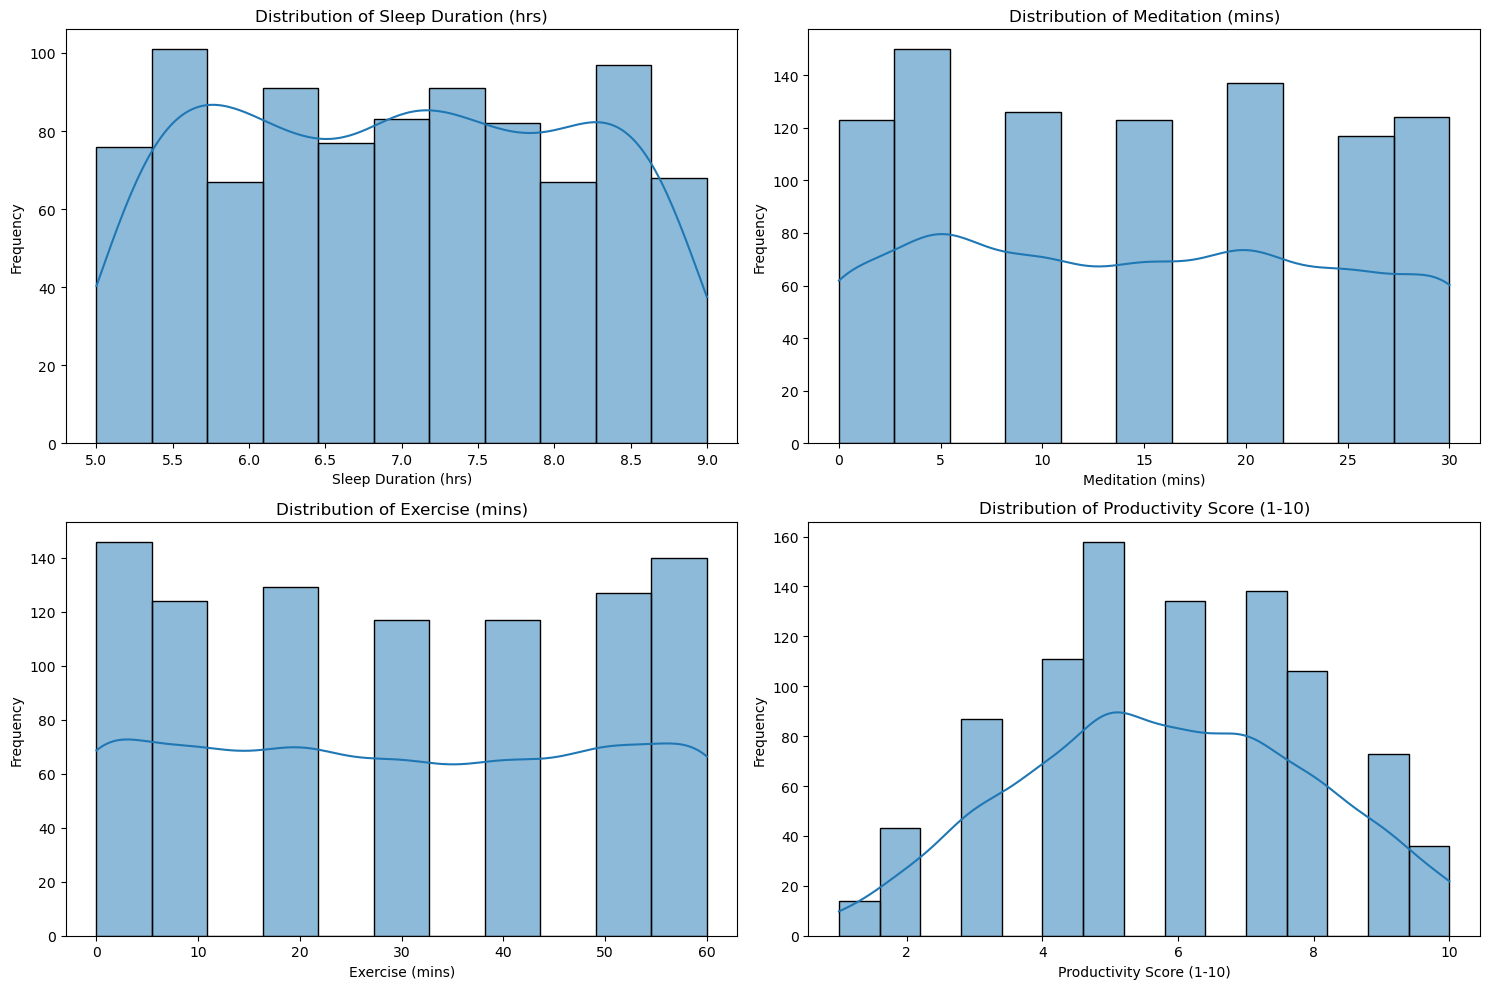

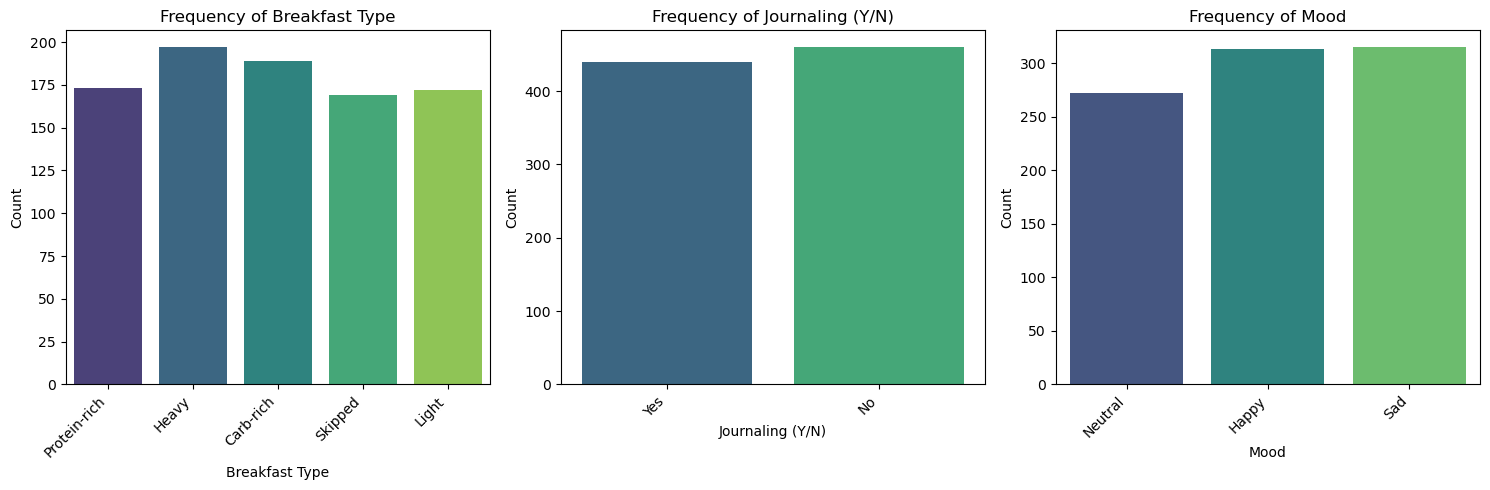

In [85]:
if not df.empty:
    # Create histograms for numerical columns
    numerical_cols = ['Sleep Duration (hrs)', 'Meditation (mins)', 'Exercise (mins)', 'Productivity Score (1-10)']
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols):
        plt.subplot(2, 2, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Create bar plots for categorical columns
    categorical_cols = ['Breakfast Type', 'Journaling (Y/N)', 'Mood']
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(categorical_cols):
        plt.subplot(1, 3, i + 1)
        # FutureWarning: Passing `palette` without assigning `hue` is deprecated
        sns.countplot(data=df, x=col, palette='viridis', hue=col, legend=False)
        plt.title(f'Frequency of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

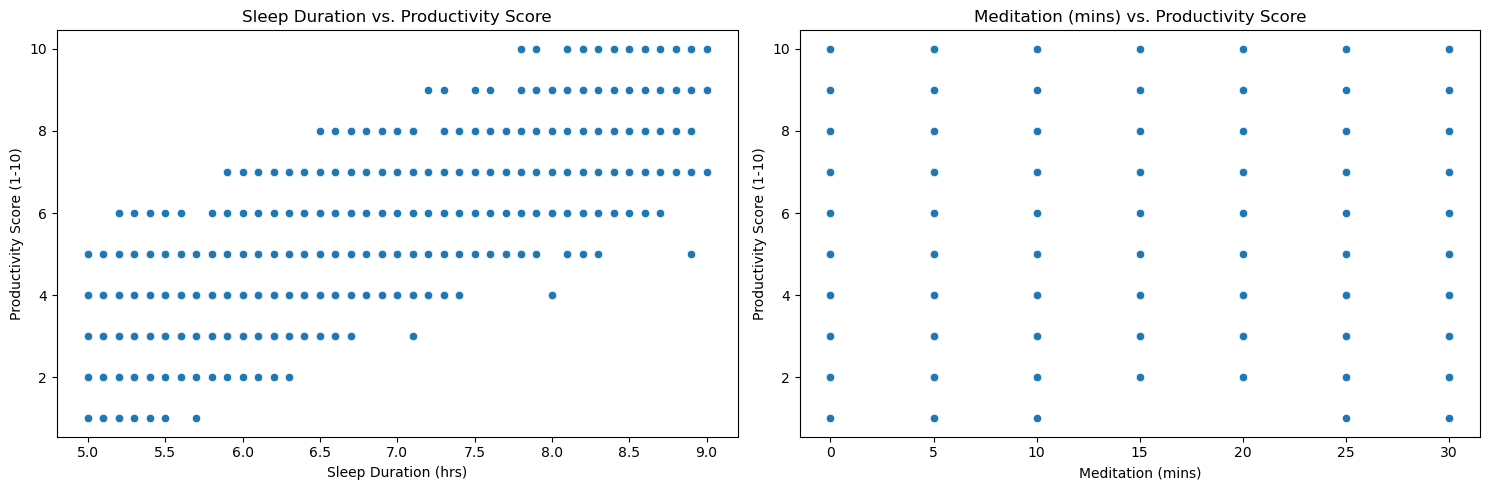

In [86]:
if not df.empty:
    # Create scatter plots to explore relationships between numerical variables
    plt.figure(figsize=(15, 5))

    # Relationship between 'Sleep Duration (hrs)' and 'Productivity Score (1-10)'
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df, x='Sleep Duration (hrs)', y='Productivity Score (1-10)')
    plt.title('Sleep Duration vs. Productivity Score')
    plt.xlabel('Sleep Duration (hrs)')
    plt.ylabel('Productivity Score (1-10)')

    # Relationship between 'Meditation (mins)' and 'Productivity Score (1-10)'
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df, x='Meditation (mins)', y='Productivity Score (1-10)')
    plt.title('Meditation (mins) vs. Productivity Score')
    plt.xlabel('Meditation (mins)')
    plt.ylabel('Productivity Score (1-10)')

    plt.tight_layout()
    plt.show()

C:\Users\Chirag\AppData\Local\Temp\ipykernel_6016\548392575.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Mood', y='Productivity Score (1-10)', palette='coolwarm')


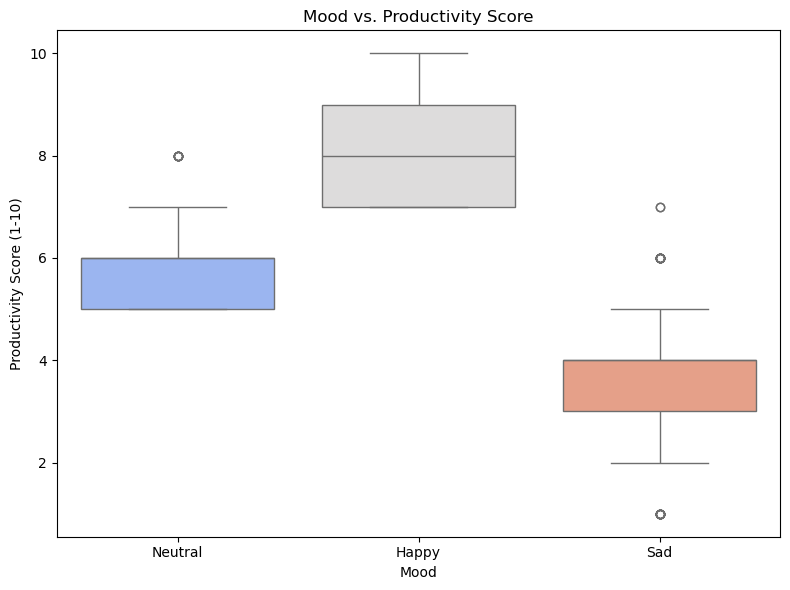

C:\Users\Chirag\AppData\Local\Temp\ipykernel_6016\548392575.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Breakfast Type', y='Sleep Duration (hrs)', palette='Pastel1')


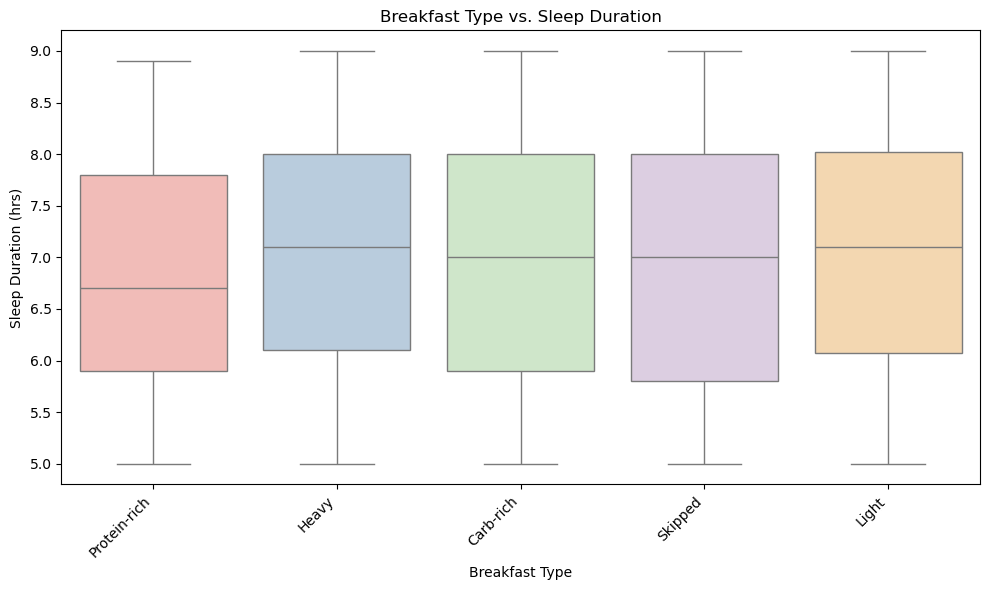

In [87]:
if not df.empty:
    # Explore relationship between 'Mood' and 'Productivity Score (1-10)' using a box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Mood', y='Productivity Score (1-10)', palette='coolwarm')
    plt.title('Mood vs. Productivity Score')
    plt.xlabel('Mood')
    plt.ylabel('Productivity Score (1-10)')
    plt.tight_layout()
    plt.show()

    # Explore relationship between 'Breakfast Type' and 'Sleep Duration (hrs)' using a box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Breakfast Type', y='Sleep Duration (hrs)', palette='Pastel1')
    plt.title('Breakfast Type vs. Sleep Duration')
    plt.xlabel('Breakfast Type')
    plt.ylabel('Sleep Duration (hrs)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Pattern & anomaly detection

In [88]:
if not df.empty:
    print("Analysis of Trends, Relationships, and Unusual Data Points:")
    print("\nScatter Plots:")
    print("- Sleep Duration vs. Productivity Score: The scatter plot shows a general trend where higher sleep duration tends to correlate with higher productivity scores, although there is considerable spread in the data. There isn't a clear linear relationship, suggesting other factors are also at play.")
    print("- Meditation (mins) vs. Productivity Score: The scatter plot for meditation minutes and productivity score does not show a strong, clear trend. The points appear relatively scattered, suggesting that meditation time within this range may not have a consistent linear relationship with productivity scores.")

    print("\nBox Plots:")
    print("- Mood vs. Productivity Score: The box plot reveals that 'Happy' and 'Neutral' moods are associated with generally higher productivity scores compared to 'Sad'. The spread of productivity scores also appears different across moods, with 'Happy' having a slightly wider range for the upper quartile.")
    print("- Breakfast Type vs. Sleep Duration: The box plot shows variations in the distribution of sleep duration across different breakfast types. While the medians are somewhat similar for most types, there are differences in the spread and potential range of sleep duration depending on the breakfast consumed.")

    print("\nUnusual Data Points:")
    print("Based on the previous outlier detection step and visual inspection of the plots, no significant unusual data points or outliers were identified in the numerical columns.")

Analysis of Trends, Relationships, and Unusual Data Points:

Scatter Plots:
- Sleep Duration vs. Productivity Score: The scatter plot shows a general trend where higher sleep duration tends to correlate with higher productivity scores, although there is considerable spread in the data. There isn't a clear linear relationship, suggesting other factors are also at play.
- Meditation (mins) vs. Productivity Score: The scatter plot for meditation minutes and productivity score does not show a strong, clear trend. The points appear relatively scattered, suggesting that meditation time within this range may not have a consistent linear relationship with productivity scores.

Box Plots:
- Mood vs. Productivity Score: The box plot reveals that 'Happy' and 'Neutral' moods are associated with generally higher productivity scores compared to 'Sad'. The spread of productivity scores also appears different across moods, with 'Happy' having a slightly wider range for the upper quartile.
- Breakfast 

## Feature engineering

In [89]:
if not df.empty:
    # Convert 'Date' column to datetime objects
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract the day of the week
    df['Day of Week'] = df['Date'].dt.day_name()

    # Function to convert time string (like '5:30 AM') to hours from midnight
    def time_to_hour(time_str):
        if pd.isna(time_str):
            return None
        try:
            # Use a dummy date to parse time strings reliably
            return pd.to_datetime(time_str).hour + pd.to_datetime(time_str).minute / 60
        except:
            return None

    # Extract hour from 'Wake-up Time' and 'Work Start Time'
    df['Wake-up Hour'] = df['Wake-up Time'].apply(time_to_hour)
    df['Work Start Hour'] = df['Work Start Time'].apply(time_to_hour)

    # Convert 'Wake-up Time' and 'Work Start Time' to datetime objects for duration calculation
    # Note: Pandas may issue a UserWarning about inferring format, which is fine here.
    df['Wake-up Time_dt'] = pd.to_datetime(df['Wake-up Time'])
    df['Work Start Time_dt'] = pd.to_datetime(df['Work Start Time'])

    # Calculate the duration between 'Wake-up Time' and 'Work Start Time' in minutes
    time_diff = df['Work Start Time_dt'] - df['Wake-up Time_dt']
    # Adjust for cases where 'Work Start Time' is on the next day (time diff is negative)
    df['Time to Start Work (mins)'] = time_diff.apply(lambda x: x.total_seconds() / 60 if x.total_seconds() >= 0 else (x + pd.Timedelta(days=1)).total_seconds() / 60)


    # Drop the intermediate datetime columns
    df = df.drop(columns=['Wake-up Time_dt', 'Work Start Time_dt'])

    # Display the first few rows with the new features
    print("\nDataFrame with new features:")
    display(df.head())


DataFrame with new features:


C:\Users\Chirag\AppData\Local\Temp\ipykernel_6016\4276038004.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Wake-up Time_dt'] = pd.to_datetime(df['Wake-up Time'])
C:\Users\Chirag\AppData\Local\Temp\ipykernel_6016\4276038004.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Work Start Time_dt'] = pd.to_datetime(df['Work Start Time'])


,Date,Wake-up Time,Sleep Duration (hrs),Meditation (mins),Exercise (mins),Breakfast Type,Journaling (Y/N),Work Start Time,Productivity Score (1-10),Mood,Notes,Day of Week,Wake-up Hour,Work Start Hour,Time to Start Work (mins)
0,2023-02-01 10:21:52.870632,5:30 AM,6.6,20,60,Protein-rich,Yes,6:30 AM,6,Neutral,Collection whole decision middle.,Wednesday,5.50,6.50,60.0
1,2023-02-02 10:21:52.870632,8:15 AM,8.0,5,50,Heavy,No,11:15 AM,7,Happy,Tree player behavior various up such attention...,Thursday,8.25,11.25,180.0
2,2023-02-03 10:21:52.870632,8:30 AM,8.9,25,30,Carb-rich,Yes,10:30 AM,10,Happy,If hard focus nor trip forward change per.,Friday,8.50,10.50,120.0
3,2023-02-04 10:21:52.870632,5:00 AM,8.4,25,30,Skipped,Yes,7:00 AM,7,Happy,Physical threat federal with thing.,Saturday,5.00,7.00,120.0
4,2023-02-05 10:21:52.870632,5:15 AM,8.2,25,30,Heavy,No,6:15 AM,10,Happy,Ground class Mr future.,Sunday,5.25,6.25,60.0


## Hypothesis testing

In [90]:
if not df.empty:
    # Hypothesis 1: Relationship between 'Sleep Duration (hrs)' and 'Productivity Score (1-10)'
    # Null Hypothesis (H0): There is no linear relationship.
    # Alternative Hypothesis (H1): There is a linear relationship.
    # Using Pearson correlation
    correlation, p_value_corr = stats.pearsonr(df['Sleep Duration (hrs)'], df['Productivity Score (1-10)'])

    print(f"Pearson Correlation between Sleep Duration and Productivity Score: {correlation:.3f}")
    print(f"P-value for Pearson Correlation: {p_value_corr:.3f}")

    # Interpretation of Hypothesis 1
    alpha = 0.05
    print("\nInterpretation for Hypothesis 1:")
    if p_value_corr < alpha:
        print(f"Since the p-value ({p_value_corr:.3f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
        print("Conclusion: There is a statistically significant linear relationship between Sleep Duration (hrs) and Productivity Score (1-10).")
    else:
        print(f"Since the p-value ({p_value_corr:.3f}) is greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis.")
        print("Conclusion: There is no statistically significant linear relationship between Sleep Duration (hrs) and Productivity Score (1-10).")


    # Hypothesis 2: Relationship between 'Mood' and 'Productivity Score (1-10)'
    # Null Hypothesis (H0): The mean Productivity Score is the same across different Mood categories.
    # Alternative Hypothesis (H1): The mean Productivity Score is different for at least one Mood category.
    # Using ANOVA
    # Prepare data for ANOVA - create a list of productivity scores for each mood
    mood_groups = df.groupby('Mood')['Productivity Score (1-10)'].apply(list)

    # Perform one-way ANOVA
    f_statistic, p_value_anova = stats.f_oneway(*mood_groups)

    print(f"\nANOVA F-statistic for Mood and Productivity Score: {f_statistic:.3f}")
    print(f"P-value for ANOVA: {p_value_anova:.3f}")

    # Interpretation of Hypothesis 2
    print("\nInterpretation for Hypothesis 2:")
    if p_value_anova < alpha:
        print(f"Since the p-value ({p_value_anova:.3f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
        print("Conclusion: There is a statistically significant difference in the mean Productivity Score among different Mood categories.")
    else:
        print(f"Since the p-value ({p_value_anova:.3f}) is greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis.")
        print("Conclusion: There is no statistically significant difference in the mean Productivity Score among different Mood categories.")

Pearson Correlation between Sleep Duration and Productivity Score: 0.796
P-value for Pearson Correlation: 0.000

Interpretation for Hypothesis 1:
Since the p-value (0.000) is less than the significance level (0.05), we reject the null hypothesis.
Conclusion: There is a statistically significant linear relationship between Sleep Duration (hrs) and Productivity Score (1-10).

ANOVA F-statistic for Mood and Productivity Score: 1580.435
P-value for ANOVA: 0.000

Interpretation for Hypothesis 2:
Since the p-value (0.000) is less than the significance level (0.05), we reject the null hypothesis.
Conclusion: There is a statistically significant difference in the mean Productivity Score among different Mood categories.


## Interpret and visualize findings (Summary Visuals)

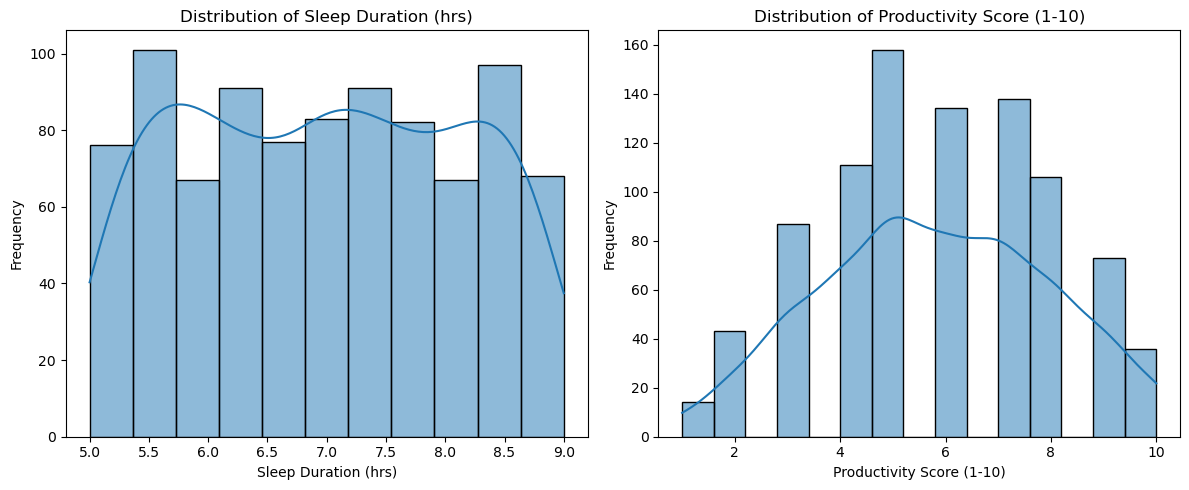

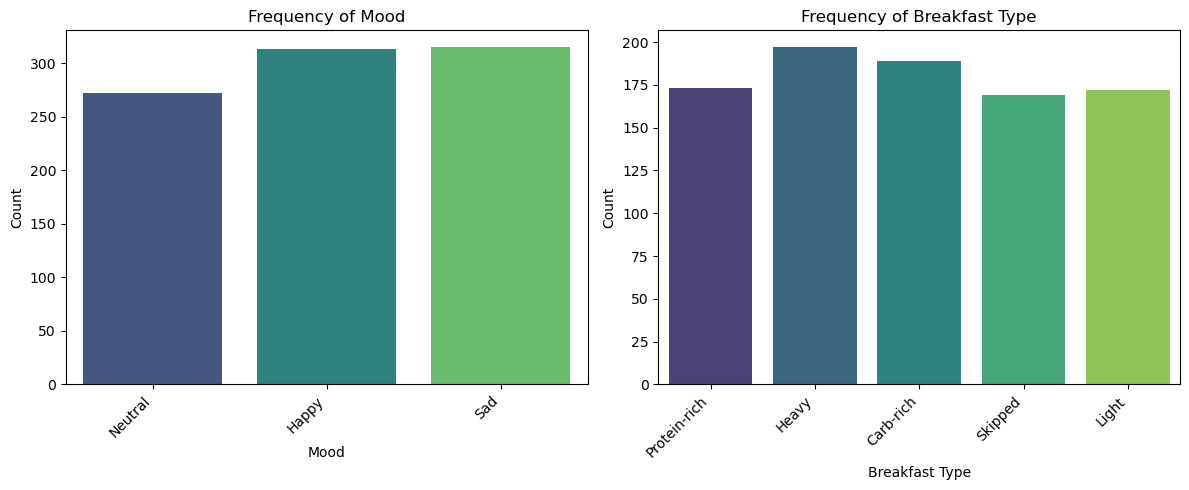

In [91]:
if not df.empty:
    # Re-create histograms for key numerical columns
    numerical_cols_summary = ['Sleep Duration (hrs)', 'Productivity Score (1-10)']
    plt.figure(figsize=(12, 5))
    for i, col in enumerate(numerical_cols_summary):
        plt.subplot(1, 2, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Re-create bar plots for key categorical columns
    categorical_cols_summary = ['Mood', 'Breakfast Type']
    plt.figure(figsize=(12, 5))
    for i, col in enumerate(categorical_cols_summary):
        plt.subplot(1, 2, i + 1)
        sns.countplot(data=df, x=col, palette='viridis', hue=col, legend=False)
        plt.title(f'Frequency of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

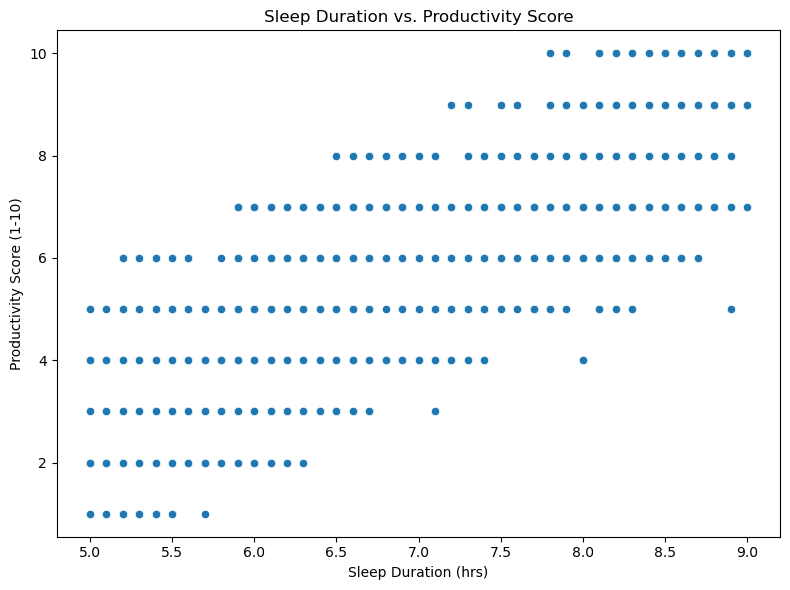

C:\Users\Chirag\AppData\Local\Temp\ipykernel_6016\2770403154.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Mood', y='Productivity Score (1-10)', palette='coolwarm')


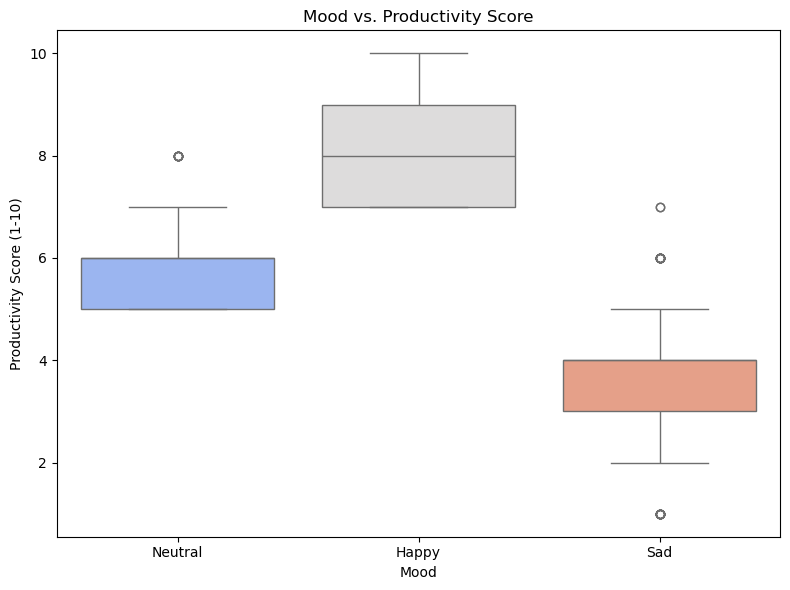

In [92]:
if not df.empty:
    # Re-create scatter plot to explore relationship between 'Sleep Duration (hrs)' and 'Productivity Score (1-10)'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Sleep Duration (hrs)', y='Productivity Score (1-10)')
    plt.title('Sleep Duration vs. Productivity Score')
    plt.xlabel('Sleep Duration (hrs)')
    plt.ylabel('Productivity Score (1-10)')
    plt.tight_layout()
    plt.show()

    # Re-create box plot to explore relationship between 'Mood' and 'Productivity Score (1-10)'
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Mood', y='Productivity Score (1-10)', palette='coolwarm')
    plt.title('Mood vs. Productivity Score')
    plt.xlabel('Mood')
    plt.ylabel('Productivity Score (1-10)')
    plt.tight_layout()
    plt.show()

## Data Preparation and Splitting for Modeling

**Reasoning**:
This step prepares the data for the 'from scratch' models. It defines features, encodes categorical features, scales numerical features, and splits the data into training and testing sets, resolving the `NameError` from the previous notebook attempt.

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

if not df.empty:
    # 1. Define Features (X) and Target (y)
    # Drop columns not used as features: original time strings, date, notes
    X = df.drop(columns=[
        'Productivity Score (1-10)', 'Date', 'Wake-up Time', 'Work Start Time', 'Notes'
    ])
    y = df['Productivity Score (1-10)']

    # 2. Define numerical and categorical features
    numerical_features = [
        'Sleep Duration (hrs)', 'Meditation (mins)', 'Exercise (mins)',
        'Wake-up Hour', 'Work Start Hour', 'Time to Start Work (mins)'
    ]
    categorical_features = [
        'Breakfast Type', 'Journaling (Y/N)', 'Mood', 'Day of Week'
    ]

    # 3. Create the preprocessing pipeline (ColumnTransformer)
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
        ],
        remainder='passthrough'
    )

    # 4. Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # 5. Apply preprocessing to training and testing data
    # The output is a numpy array, suitable for the 'from scratch' models.
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    print("\n--- Data Splitting and Preprocessing Complete ---")
    print(f"Processed Training Data Shape: {X_train_processed.shape}")
    print(f"Processed Testing Data Shape: {X_test_processed.shape}")
else:
    print("Dataframe is empty. Skipping data preparation.")



--- Data Splitting and Preprocessing Complete ---
Processed Training Data Shape: (675, 23)
Processed Testing Data Shape: (225, 23)


## Model 1: Linear Regression (From Scratch)

Features (X) shape: (900, 3)
Target (y) shape: (900,)
Features with bias (X_b) shape: (900, 4)
X_train shape: (720, 4)
X_test shape: (180, 4)
y_train shape: (720,)
y_test shape: (180,)
Gradient descent functions defined.


c:\Users\Chirag\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Chirag\AppData\Local\Temp\ipykernel_6016\4054660649.py:38: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum(np.square(predictions - y))


Weights after first training: [nan nan nan nan]
Final Optimal Weights: [ 0.03441416  0.81618827 -0.0065424   0.01002664]

--- MODEL PERFORMANCE METRICS ---
R²   (Higher is better): 0.4962
MAE  (Lower is better) : 1.1479
RMSE (Lower is better) : 1.4000


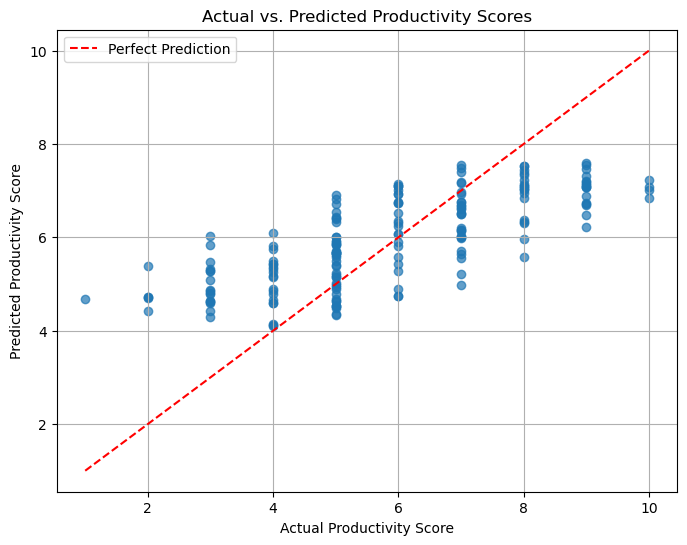

In [94]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -----------------------------
# Load features & target
# -----------------------------
# Define the features (independent variables)
X = df[['Sleep Duration (hrs)', 'Meditation (mins)', 'Exercise (mins)']].values

# Define the target variable (dependent variable)
y = df['Productivity Score (1-10)'].values

# Add a bias term (intercept) to the feature matrix
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("Features with bias (X_b) shape:", X_b.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# -----------------------------
# Linear Regression Utilities
# -----------------------------
def predict(X, weights):
    return np.dot(X, weights)

def compute_cost(X, y, weights):
    m = len(y)
    predictions = predict(X, weights)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        predictions = predict(X, weights)
        error = predictions - y
        gradients = (1/m) * np.dot(X.T, error)
        weights -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, weights))
    return weights, cost_history

print("Gradient descent functions defined.")

# -----------------------------
# Model Training
# -----------------------------
# Note: You trained TWICE in your original code
# First training (higher LR)
initial_weights = np.zeros(X_train.shape[1])
learning_rate = 0.01
iterations = 5000
optimal_weights, cost_history = gradient_descent(X_train, y_train, initial_weights, learning_rate, iterations)

print("Weights after first training:", optimal_weights)

# Second training (lower LR) -> final model
initial_weights = np.zeros(X_train.shape[1])
learning_rate = 0.0001
iterations = 5000

optimal_weights, cost_history = gradient_descent(X_train, y_train, initial_weights, learning_rate, iterations)

print("Final Optimal Weights:", optimal_weights)

# -----------------------------
# Predictions
# -----------------------------
y_pred = predict(X_test, optimal_weights)

# -----------------------------
# Final 3 Metrics (Requested)
# -----------------------------
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- MODEL PERFORMANCE METRICS ---")
print(f"R²   (Higher is better): {r2:.4f}")
print(f"MAE  (Lower is better) : {mae:.4f}")
print(f"RMSE (Lower is better) : {rmse:.4f}")

# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)

# Perfect prediction line
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

plt.xlabel('Actual Productivity Score')
plt.ylabel('Predicted Productivity Score')
plt.title('Actual vs. Predicted Productivity Scores')
plt.legend()
plt.grid(True)
plt.show()


## Model 2: Random Forest Regressor (From Scratch)

MAE 1.6095 MSE 3.86 RMSE 1.9647 R2 0.0078


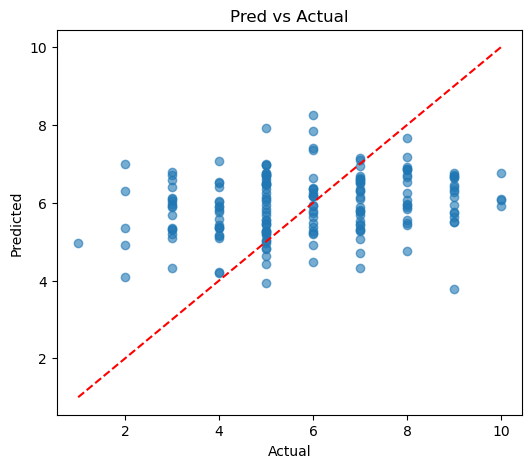

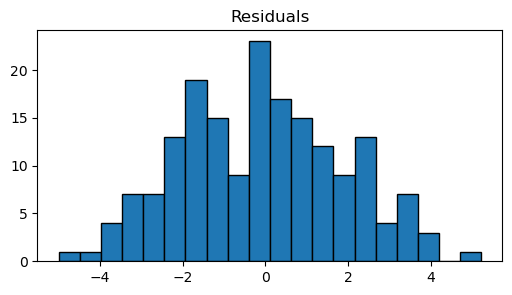

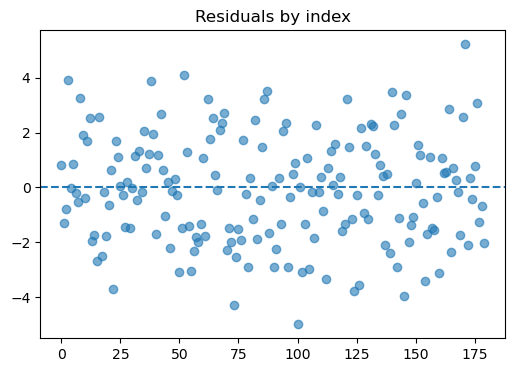

In [95]:
# Minimal RF (uses your variable names: X_train_processed, y_train, X_test_processed, y_test)
import numpy as np, pandas as pd, matplotlib.pyplot as plt

# --- tiny decision tree ---
class DT:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth, self.min_samples_split = max_depth, min_samples_split
        self.tree = None
    def _mse(self,y): return 0.0 if len(y)==0 else np.mean((y-np.mean(y))**2)
    def _best(self,X,y):
        n,m=X.shape; best=(None,None,float('inf'))
        for j in range(m):
            for t in np.unique(X[:,j]):
                L=np.where(X[:,j]<=t)[0]; R=np.where(X[:,j]>t)[0]
                if len(L)==0 or len(R)==0: continue
                wm=(len(L)/n)*self._mse(y[L]) + (len(R)/n)*self._mse(y[R])
                if wm<best[2]: best=(j,float(t),wm)
        return best[0], best[1]
    def _build(self,X,y,depth=0):
        if (self.max_depth is not None and depth>=self.max_depth) or len(y)<self.min_samples_split or len(np.unique(y))==1:
            return float(np.mean(y))
        f,t=self._best(X,y)
        if f is None: return float(np.mean(y))
        L=np.where(X[:,f]<=t)[0]; R=np.where(X[:,f]>t)[0]
        return {"f":int(f),"t":float(t),"l":self._build(X[L],y[L],depth+1),"r":self._build(X[R],y[R],depth+1)}
    def fit(self,X,y):
        X=np.asarray(X); X=X.reshape(-1,1) if X.ndim==1 else X
        y=np.asarray(y).flatten(); self.tree=self._build(X,y,0)
    def _p1(self,x,node):
        if not isinstance(node, dict): return float(node)
        return self._p1(x,node["l"]) if x[node["f"]] <= node["t"] else self._p1(x,node["r"])
    def predict(self,X):
        X=np.asarray(X); X=X.reshape(-1,1) if X.ndim==1 else X
        return np.array([self._p1(row,self.tree) for row in X])

# --- tiny random forest ---
class RF:
    def __init__(self,n_estimators=10,max_depth=10,min_samples_split=2,random_state=42):
        self.n_estimators=int(n_estimators); self.max_depth=max_depth
        self.min_samples_split=min_samples_split; self.rs=int(random_state); self.trees=[]
    def fit(self,X,y):
        X=np.asarray(X); X=X.reshape(-1,1) if X.ndim==1 else X
        y=np.asarray(y).flatten(); n=X.shape[0]; rng=np.random.RandomState(self.rs); self.trees=[]
        for _ in range(self.n_estimators):
            idx=rng.choice(n,n,replace=True); t=DT(max_depth=self.max_depth,min_samples_split=self.min_samples_split)
            t.fit(X[idx], y[idx]); self.trees.append(t)
    def predict(self,X):
        X=np.asarray(X); X=X.reshape(-1,1) if X.ndim==1 else X
        preds=np.array([t.predict(X) for t in self.trees]); return preds.mean(axis=0)

# --- metrics ---
def MAE(a,b): a,b=np.asarray(a).flatten(),np.asarray(b).flatten(); return np.mean(np.abs(a-b))
def MSE(a,b): a,b=np.asarray(a).flatten(),np.asarray(b).flatten(); return np.mean((a-b)**2)
def RMSE(a,b): return np.sqrt(MSE(a,b))
def R2(a,b):
    a,b=np.asarray(a).flatten(),np.asarray(b).flatten()
    ss_tot=np.sum((a-np.mean(a))**2)
    return 0.0 if ss_tot==0 else 1-np.sum((a-b)**2)/ss_tot

# --- Use notebook variables and align safely ---
# Expected: X_train_processed, y_train, X_test_processed, y_test exist in the notebook.
# If X_test_processed is a DataFrame and y_test is a Series with mismatched index, reindex and drop NaNs.
if isinstance(X_test_processed, pd.DataFrame) and isinstance(y_test, pd.Series):
    if not X_test_processed.index.equals(y_test.index):
        y_test = y_test.reindex(X_test_processed.index)
        mask = ~y_test.isna()
        X_test_used = X_test_processed[mask]
        y_test_used = y_test[mask].values.flatten()
    else:
        X_test_used = X_test_processed
        y_test_used = y_test.values.flatten()
else:
    X_test_used = X_test_processed
    y_test_used = np.asarray(y_test).flatten()

X_train_used = X_train_processed
y_train_used = np.asarray(y_train).flatten()

# Convert to numpy arrays for training/prediction
X_train_a = np.asarray(X_train_used); X_train_a = X_train_a.reshape(-1,1) if X_train_a.ndim==1 else X_train_a
X_test_a  = np.asarray(X_test_used);  X_test_a  = X_test_a.reshape(-1,1)  if X_test_a.ndim==1 else X_test_a

# Train and predict
rf = RF(n_estimators=15, max_depth=10, random_state=42)
rf.fit(X_train_a, y_train_used)
y_pred = rf.predict(X_test_a).flatten()

# Trim if lengths mismatch (warning)
if y_pred.shape[0] != y_test_used.shape[0]:
    mn = min(y_pred.shape[0], y_test_used.shape[0])
    print(f"WARNING: trimming to shortest length {mn}")
    y_pred = y_pred[:mn]; y_test_used = y_test_used[:mn]

# Metrics & plots
print("MAE",round(MAE(y_test_used,y_pred),4),
      "MSE",round(MSE(y_test_used,y_pred),4),
      "RMSE",round(RMSE(y_test_used,y_pred),4),
      "R2",round(R2(y_test_used,y_pred),4))

plt.figure(figsize=(6,5)); plt.scatter(y_test_used,y_pred,alpha=0.6)
m=min(np.min(y_test_used),np.min(y_pred)); M=max(np.max(y_test_used),np.max(y_pred))
plt.plot([m,M],[m,M],'r--'); plt.xlabel("Actual"); plt.ylabel("Predicted"); plt.title("Pred vs Actual"); plt.show()

res = y_test_used - y_pred
plt.figure(figsize=(6,3)); plt.hist(res,bins=20,edgecolor='k'); plt.title("Residuals"); plt.show()
plt.figure(figsize=(6,4)); plt.scatter(range(len(res)),res,alpha=0.6); plt.axhline(0,linestyle='--'); plt.title("Residuals by index"); plt.show()


In [ ]:
import pickle
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f, protocol=pickle.HIGHEST_PROTOCOL)
print("Saved: rf_model.pkl (pickle)")

Saved: rf_model.pkl (pickle)


In [ ]:
#KNN Model

Full dataset shape: (900, 9)
Feature matrix shape: (900, 8)
Target shape: (900,)
Numeric cols: ['Sleep Duration (hrs)', 'Meditation (mins)', 'Exercise (mins)']
Categorical cols: ['Wake-up Time', 'Breakfast Type', 'Journaling (Y/N)', 'Work Start Time', 'Mood']
After split -> X_train: (720, 8) X_test: (180, 8) y_train: (720,) y_test: (180,)
Preprocessor saved as preprocessor.pkl
Processed shapes -> X_train_processed: (720, 69) X_test_processed: (180, 69)
Prediction shape: (180,) y_test shape: (180,)

KNN-from-scratch results:
MAE:  0.8956
MSE:  1.2987
RMSE: 1.1396
R²:   0.6662


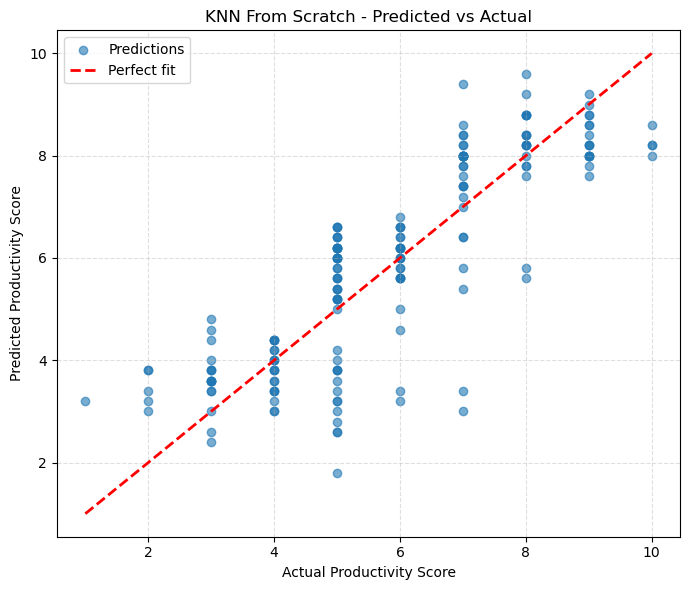

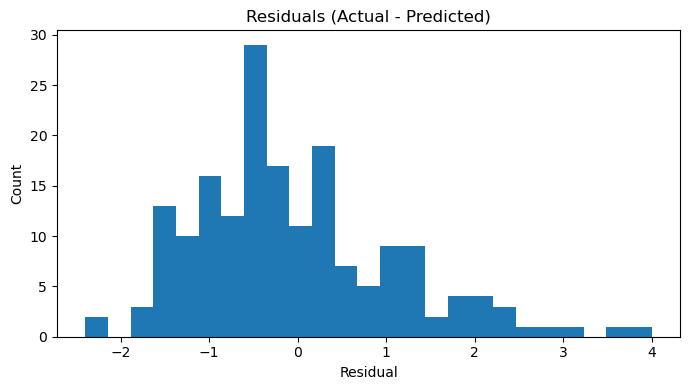

In [ ]:
# -------------------------
# Full safe KNN-from-scratch block (self-contained)
# -------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import inspect

# --- 1) Load dataset fresh (so we know exactly what X/y are) ---
df = pd.read_csv("Morning_Routine_Productivity_Dataset.csv")

# Update this if your target column name differs
target_col = "Productivity Score (1-10)"

# Basic cleaning
df = df.drop(columns=["Date","Notes","Unnamed: 0"], errors="ignore")
df = df.dropna(subset=[target_col]).reset_index(drop=True)

# Features and target
X = df.drop(columns=[target_col])
y = df[target_col]

print("Full dataset shape:", df.shape)
print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)

# --- 2) Detect numeric / categorical columns ---
numeric_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object","category","bool"]).columns.tolist()
print("Numeric cols:", numeric_cols)
print("Categorical cols:", cat_cols)

# --- 3) Create OneHotEncoder compatible with sklearn version ---
def make_OHE():
    sig = inspect.signature(OneHotEncoder)
    if "sparse_output" in sig.parameters:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    elif "sparse" in sig.parameters:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)
    else:
        return OneHotEncoder(handle_unknown="ignore")

numeric_transformer = Pipeline([("scaler", StandardScaler())])
transformers = []
if numeric_cols:
    transformers.append(("num", numeric_transformer, numeric_cols))
if cat_cols:
    cat_pipeline = Pipeline([("onehot", make_OHE())])
    transformers.append(("cat", cat_pipeline, cat_cols))

if not transformers:
    raise RuntimeError("No feature columns detected. Check dataframe and target_col.")

preprocessor = ColumnTransformer(transformers=transformers, remainder="drop")

# --- 4) FINAL train/test split (this is the only split used here) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("After split -> X_train:", X_train.shape, "X_test:", X_test.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)

# --- 5) Fit and transform (convert sparse -> dense if needed) ---
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed  = preprocessor.transform(X_test)

# If result is sparse or has toarray(), convert to numpy array
if hasattr(X_train_processed, "toarray"):
    X_train_processed = X_train_processed.toarray()
if hasattr(X_test_processed, "toarray"):
    X_test_processed = X_test_processed.toarray()

with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

print("Preprocessor saved as preprocessor.pkl")

print("Processed shapes -> X_train_processed:", getattr(X_train_processed, "shape", None),
      "X_test_processed:", getattr(X_test_processed, "shape", None))
# Final safety check
if X_train_processed.shape[0] != y_train.shape[0] or X_test_processed.shape[0] != y_test.shape[0]:
    raise RuntimeError("Shape mismatch AFTER processing. Aborting. \
        Check that y and X come from same split and no other split was run.")

# -------------------------
# 6) KNN From Scratch
# -------------------------
class KNNRegressorFromScratch:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y).reshape(-1)  # ensure 1D

    def _euclidean(self, a, b):
        # a, b are 1d arrays
        return np.sqrt(np.sum((a - b) ** 2))

    def predict_single(self, x):
        # compute distances to all train points
        dists = np.linalg.norm(self.X_train - x, axis=1)  # vectorized
        # get indices of k smallest distances
        k = min(self.n_neighbors, len(dists))
        idx = np.argsort(dists)[:k]
        return np.mean(self.y_train[idx])

    def predict(self, X):
        X = np.array(X)
        preds = np.array([self.predict_single(x) for x in X])
        return preds

# Train & predict
knn_scratch = KNNRegressorFromScratch(n_neighbors=5)
knn_scratch.fit(X_train_processed, y_train.values)
y_pred_knn = knn_scratch.predict(X_test_processed)

print("Prediction shape:", y_pred_knn.shape, "y_test shape:", y_test.values.shape)

# -------------------------
# 7) Metrics
# -------------------------
def MAE(y_true, y_pred): return np.mean(np.abs(y_true - y_pred))
def MSE(y_true, y_pred): return np.mean((y_true - y_pred)**2)
def RMSE(y_true, y_pred): return np.sqrt(MSE(y_true, y_pred))
def R2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/ss_tot if ss_tot != 0 else 1.0

mae_knn = MAE(y_test.values, y_pred_knn)
mse_knn = MSE(y_test.values, y_pred_knn)
rmse_knn = RMSE(y_test.values, y_pred_knn)
r2_knn = R2(y_test.values, y_pred_knn)

print("\nKNN-from-scratch results:")
print(f"MAE:  {mae_knn:.4f}")
print(f"MSE:  {mse_knn:.4f}")
print(f"RMSE: {rmse_knn:.4f}")
print(f"R²:   {r2_knn:.4f}")

# -------------------------
# 8) Predicted vs Actual Plot
# -------------------------
plt.figure(figsize=(7,6))
plt.scatter(y_test.values, y_pred_knn, alpha=0.6, label="Predictions")
minv = min(y_test.values.min(), y_pred_knn.min())
maxv = max(y_test.values.max(), y_pred_knn.max())
plt.plot([minv, maxv], [minv, maxv], 'r--', linewidth=2, label='Perfect fit')
plt.xlabel("Actual Productivity Score")
plt.ylabel("Predicted Productivity Score")
plt.title("KNN From Scratch - Predicted vs Actual")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# -------------------------
# 9) Residual plot (optional)
# -------------------------
residuals = y_test.values - y_pred_knn
plt.figure(figsize=(7,4))
plt.hist(residuals, bins=25)
plt.title("Residuals (Actual - Predicted)")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.tight_layout()
plt.show()




In [ ]:
import pickle
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_scratch, f)